# Developing a Player Retention Prediction Model Based on Past Participation Data

#### Catherine Zhao,  Hannah Zhao,   Bowen Zhu,   Winnie Chen

## Introduction:

With the advancement of video game research, predicting the usage of game servers plays a crucial rule in research teams effectively managing backend resources and user engagement. This report is a proposal for a data science study that aims to predict, based on past behavior, whether a player on a research Minecraft server would continue to participate. A UBC computer science research team supplied the dataset, and this effort fits with their objective of comprehending player retention and allocating server resources appropriately. Our main goal is to create a model that can categorize gamers according to their propensity to continue playing, which will aid the research team in efficiently allocating server resources and concentrating recruitment efforts.

The ability to predict player retention has significant implications for both academic research and practical server management. Our question is thus: **Given a player’s past participation data, can we predict whether they will continue to contribute to the research Minecraft server?**

#### Dataset Description:

The dataset provided by the UBC research team  can be found here: https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz

`players.csv:` 

- Number of Observations: 196 entries.
- Number of Variables: 9 columns.

Summary of Variables：

| Column Name        | Data Type | Description                                         | Notes/Observations                                         |
|--------------------|-----------|-----------------------------------------------------|------------------------------------------------------------|
| `experience`       | Character     | Level of experience.  | 5 unique experience levels. |
| `subscribe`        | Logical   | Subscription status.                | True/False.
| `hashedEmail`      | Character    | Hashed email addresses.         | All values are different.                      |
| `played_hours`     | Double (numeric)     | Total hours played by each user.                    | Range from 0 to 223hours.|
| `name`             | Character     | Player names.               | Unique values for each user.                           |
| `gender`           | Character     | Gender of players(Male/Female/etc.).             |  7 unique values.
| `age`              | Double (numeric)   | Age of players.                                     | Ages range from 8 to 99.
| `individualId`     | Logical      | Identifier for individual users.                    | All values are missing.                              |
| `organizationName` | Logical      | Identifier for the organization name.               | All values are missing.                              |


To address a predictive question, we are predicting whether a player will continue to participate. Set the`subscribe`as a Response Variable based on several Explanatory variables as `played_hours`, `experience`,`gender`, and `age`.



## Methods & Results:


#### Preprocessing and exploratory data analysis

1. **Imported Libraries and Loaded Dataset**  
    Loaded the `players.csv` dataset provided by a UBC research team. Key libraries such as `tidyverse` were loaded for the   manipulation and visualization of data.
2. **Data Cleaning and Wrangling**  
   Removed unnecessary columns (`hashedEmail`, `individualId`, `organizationName`) to focus on relevant features.  
    Converted categorical columns (`experience`, `gender`, `subscribe`) into factor types for analysis.  
3. **Data Splitting**  
   Split the data  into training and testing sets. The testing data was not seen while developing the model. Only the training set was used to develop the initial analysis and modeling.
4. **Created visualizations**  
    Summarized key features of the dataset, including `played_hours`, `experience`, and `age`,`gender` to identify patterns and trends.

#### Finding the Best Model

Our goal is to find the best value for the *k*-nearest neighbors, providing the highest accuracy in predictions. Here's how we optimized the model:

1. **Feature Scaling and Transformation**  
   Used a `recipe` function to standardize the data.
2. **Cross-Validation**  
      Performed  10-fold cross-validation on the training set using `vfold_cv`. Chosen 10 folds because this allows a good balance between computational efficiency and accuracy.
3. **Model Selection and Tuning**  
    Develop a k-nearest neighbors (k-NN) model with `neighbours = tune()` to identify the optimal value of *k*. 
    Integrate the recipe and model into a workflow, and use `tune_grid` to perform cross-validation across a specified range of *k* values defined in `gridvals`.

5. **Optimal Model Identification**  
   Selected the best *k* value based on the highest accuracy and plotted the line graph of accuracy estimates for each *k*, identifying trends.




#### Testing the Classifier

1. **Final Model Fitting**  
    Made a new model specification for the best *k* value chosen, and a final k-NN model was trained on the full training dataset.
2. **Evaluation on Testing Set**  
    Used `predict` on the testing set to evaluate the classifier's prediction accuracy.
    Generated a confusion matrix to analyze the model's performance.
    Tested the accuracy of our classifier with given data.

### Setting Up Libraries and Parameters

In [62]:
# Run this first.
# Load required libraries.
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(ggplot2)
library(GGally)
library(dplyr) 


### Loading and Wrangling Data

In [63]:
# Load the dataset.

url1<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz" 

player_data_raw<-read_csv(url1)

head(player_data_raw)

#Wrangling the dataset.

#A random seed is set to ensure the data split is consistent and reproducible.
set.seed(2000)

players<- player_data_raw |>
select(experience, played_hours, gender, age, subscribe)

players <- players |>
  mutate(
    played_hours = replace_na(played_hours, median(played_hours, na.rm = TRUE)),
    age = replace_na(age, median(age, na.rm = TRUE))) 


players <- players |>
  mutate(experience = as_factor(experience)) |>
  mutate(gender = as_factor(gender)) |>
  mutate(subscribe = as_factor(subscribe))



head(players)


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


experience,played_hours,gender,age,subscribe
<fct>,<dbl>,<fct>,<dbl>,<fct>
Pro,30.3,Male,9,TRUE
Veteran,3.8,Male,17,TRUE
Veteran,0.0,Male,17,FALSE
Amateur,0.7,Female,21,TRUE
Regular,0.1,Male,21,TRUE
Amateur,0.0,Female,17,TRUE


### Summarizing the data

This step groups the data by `experience` and `subscribe`, and by `gender` and `subscribe`, to count the number of players in each category.

In [64]:
player_data_1<-players|>
   group_by(experience,subscribe) |>
   summarize(count = n()) 
player_data_1

player_data_3<-players|>
   group_by(gender,subscribe) |>
   summarize(count = n()) 
player_data_3


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<fct>,<fct>,<int>
Pro,FALSE,4
Pro,TRUE,10
Veteran,FALSE,15
Veteran,TRUE,33
Amateur,FALSE,18
Amateur,TRUE,45
Regular,FALSE,7
Regular,TRUE,29
Beginner,FALSE,8


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,subscribe,count
<fct>,<fct>,<int>
Male,FALSE,31
Male,TRUE,93
Female,FALSE,8
Female,TRUE,29
Non-binary,FALSE,4
Non-binary,TRUE,11
Prefer not to say,FALSE,7
Prefer not to say,TRUE,4
Agender,TRUE,2


### Creating Visualization

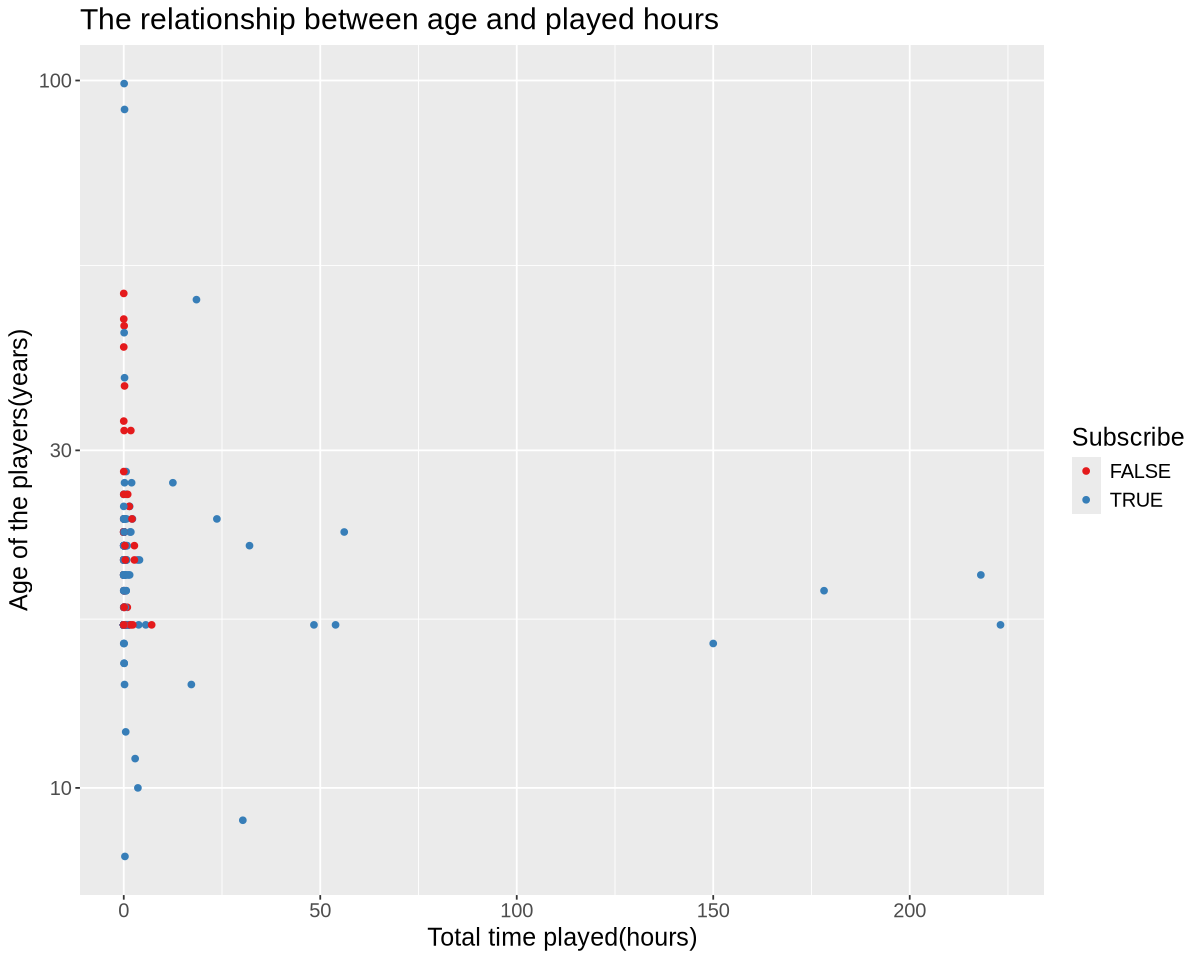

In [65]:
# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 8) 

#create a visualization based on player's played hours and age
player_data_2_plot<-players|>
    ggplot(aes(x =played_hours, y = age, color = subscribe)) +
                 geom_point() +
                 labs(x = "Total time played(hours)", 
                      y = "Age of the players(years)", 
                      color = "Subscribe",
                     title="The relationship between age and played hours" ) +
                 scale_color_brewer(palette = "Set1")+
    scale_y_log10(labels = label_comma())+
  theme(text=element_text(size=15))

player_data_2_plot



This scatter plot shows the relationship between players' age and total hours played，categorized by subscription status (TRUE or FALSE).

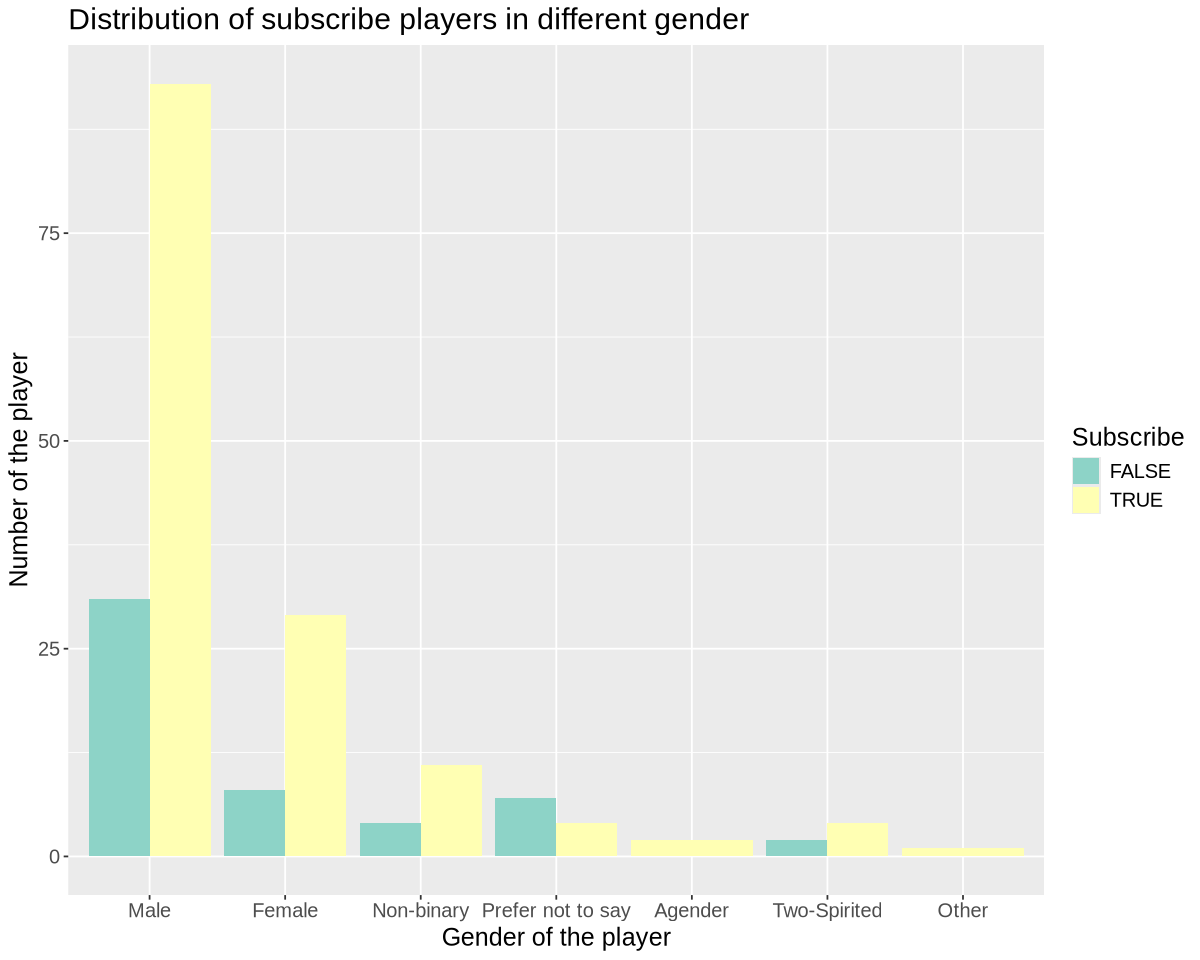

In [66]:
# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 8) 

#create a visualization based on the player's gender
play_data_3_plot<-ggplot(player_data_3,aes(x = gender, y = count,fill=subscribe)) + 
   geom_bar(stat = "identity",position="dodge") + 
 labs(x="Gender of the player",
        y="Number of the player",
        fill="Subscribe",
         title="Distribution of subscribe players in different gender")+
    scale_fill_brewer(palette = 'Set3')+
  theme(text=element_text(size=15))

play_data_3_plot

The bar chart shows the distribution of subscribed and non-subscribed players across various gender categories, emphasizing that male players have the highest number of subscriptions compared to other genders.

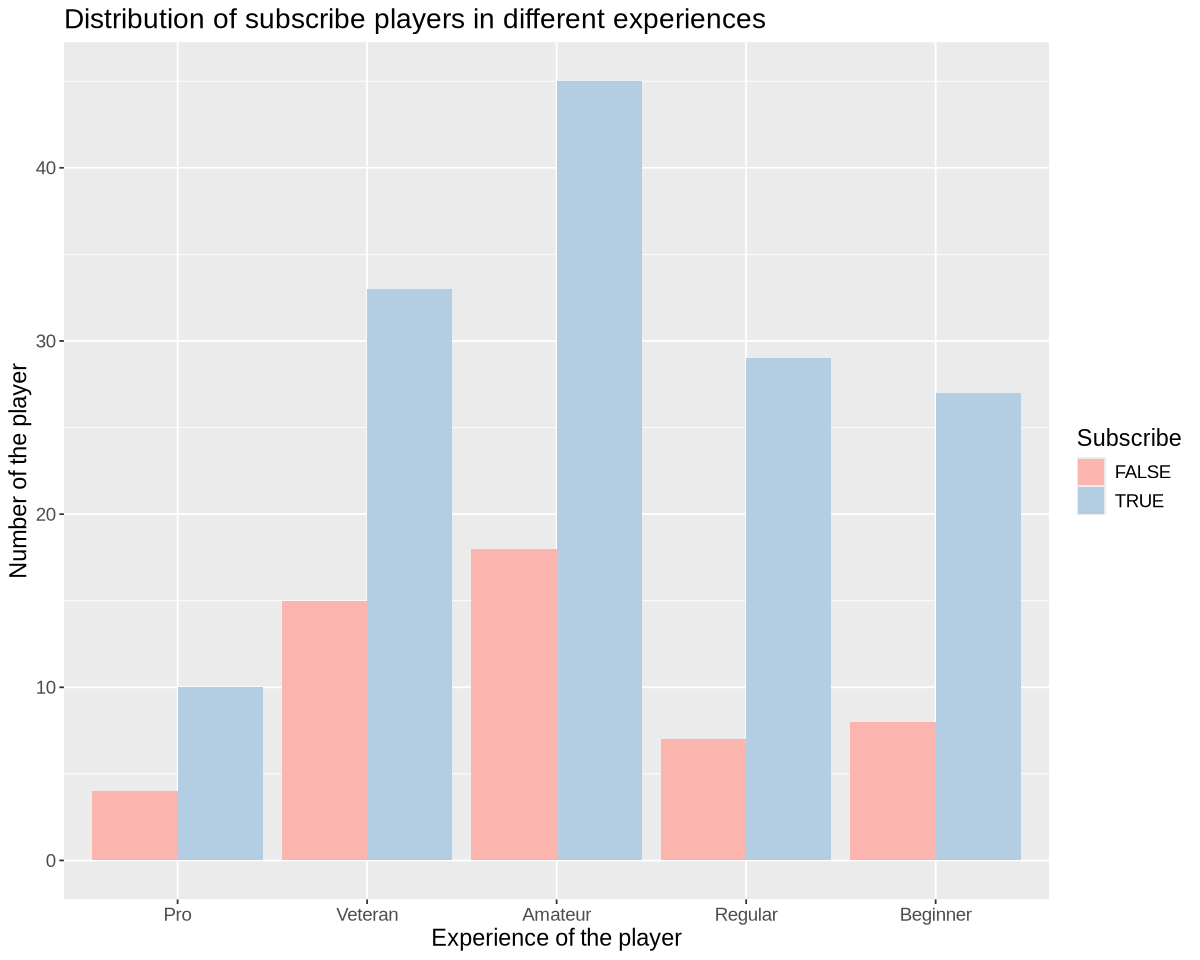

In [67]:
# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 8) 

#create a visualization based on the player's experience

play_data_1_plot<-ggplot(player_data_1,aes(x = experience, y = count,fill=subscribe)) + 
   geom_bar(stat = "identity",position="dodge") + 
 labs(x="Experience of the player",
        y="Number of the player",
        fill="Subscribe",
         title="Distribution of subscribe players in different experiences")+
    scale_fill_brewer(palette = 'Pastel1')+
  theme(text=element_text(size=14))

play_data_1_plot

The bar chart illustrates the distribution of subscribed and non-subscribed players across various experience levels. It highlights a trend where players with higher experience levels, such as Veterans and Regulars, are more likely to be subscribed.

### Creating the model

The `initial_split` function is used to divide the dataset `players` into training and testing sets. It allocates 75% of the data to the training set and the remaining 25% to the testing set. This function performs stratified sampling based on the `subscribe` column, ensuring that the class proportions of the target variable (`subscribe`) are consistent in both the training and testing sets.

The `training` function is used to extract the training set from the `players_split` object.

The `testing` function is used to extract the testing set from the `players_split` object.

In [68]:
players_split <- initial_split(players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

We calculate the count and proportion of each category (`FALSE` and `TRUE`) in the target variable `subscribe` within the training dataset `players_train`. 

First, it uses `group_by(subscribe)` to group the data by the `subscribe` column, then applies `summarize(n = n())` to count the number of rows for each category. Finally, it uses `mutate(percent = 100 * n / nrow(players_train))` to compute the percentage of each category relative to the total number of rows in the training dataset. 

`TRUE` making up 73.47% and `FALSE` only 26.53%. 

It shows that our class proportions were roughly preserved when we split the data.

In [69]:
players_proportions <- players_train |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(players_train))
players_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.53061
TRUE,108,73.46939


The recipe is defined using `recipe()`, where `subscribe ~ .` specifies `subscribe` as the target variable, and all other columns are treated as predictors, with the data sourced from the training set `players_train`. Then, `step_scale()` is used to scale all numeric predictors so that their standard deviation becomes 1, and `step_center()` is applied to center these variables by adjusting their mean to 0. These preprocessing steps help standardize numeric features, eliminate differences in feature scales, and improve the model's performance and accuracy.

In [70]:
players_recipe <- recipe(subscribe ~ ., data = players_train) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors()) 
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



1. We use `nearest_neighbor()` to define the KNN model, setting the `neighbors` parameter as a tunable hyperparameter and using a rectangular weight function with equal weights for all neighbors.

2. We use `vfold_cv()` to perform 10-fold cross-validation on the training data, ensuring stratified sampling to maintain the class distribution of the target variable `subscribe`.

3. We create a grid of different `k` values ranging from 1 to 100, increasing by 5 for hyperparameter tuning.

4. We use `workflow()` to combine the `players_recipe` and the KNN model into a complete pipeline.

5. We use `tune_grid()` to tune the `k` parameter on the cross-validation folds, performing a grid search to determine the best number of neighbors.

6. We use `collect_metrics()` to gather accuracy for each value of `k` to analyze the model's performance.

In [71]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

players_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5990842,10,0.038879610,Preprocessor1_Model01
6,accuracy,binary,0.6801832,10,0.017017660,Preprocessor1_Model02
11,accuracy,binary,0.7206593,10,0.012370641,Preprocessor1_Model03
16,accuracy,binary,0.7273260,10,0.004326964,Preprocessor1_Model04
21,accuracy,binary,0.7283516,10,0.008060680,Preprocessor1_Model05
26,accuracy,binary,0.7350183,10,0.004246628,Preprocessor1_Model06
31,accuracy,binary,0.7350183,10,0.004246628,Preprocessor1_Model07
36,accuracy,binary,0.7350183,10,0.004246628,Preprocessor1_Model08
41,accuracy,binary,0.7350183,10,0.004246628,Preprocessor1_Model09


This code generates a plot to visualize the relationship between the number of neighbors (`k`) and the estimated accuracy of the KNN model.

The plot shows how the accuracy of the KNN model changes with the number of neighbors (`k`). At very low `k` values (e.g., `k = 1`), the model tends to overfit, resulting in lower generalization ability. As `k` increases, the accuracy improves and stabilizes, reaching its peak or plateau between`k = 20` and `k = 30`. Beyond `k = 25`, the accuracy remains stable, showing diminishing returns with higher `k` values. 

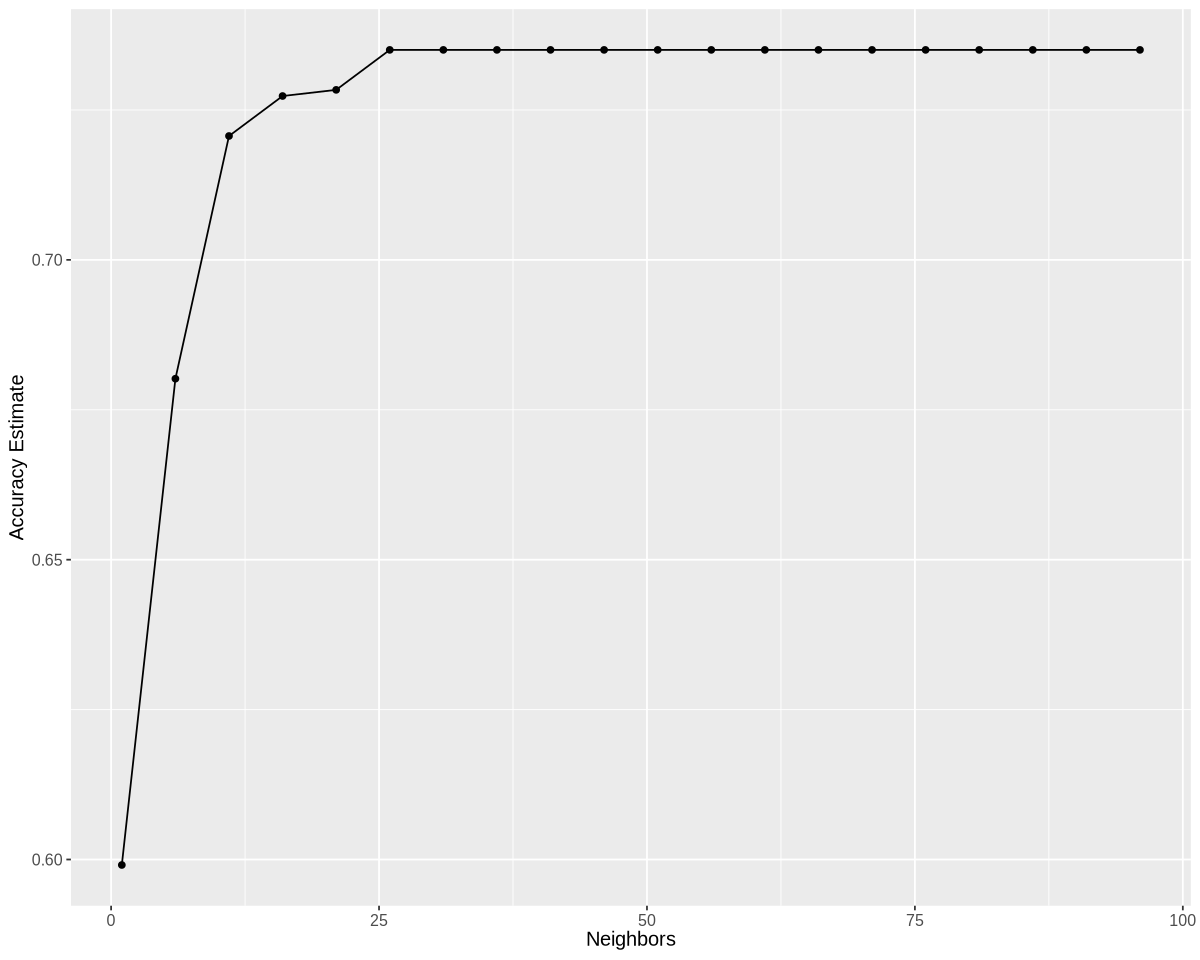

In [72]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k

We use this code to select the optimal `k` value with the highest accuracy from the `accuracies` dataset. 

First, we sort the data in descending order of the `mean` column using `arrange(desc(mean))`, ensuring the `k` value with the highest accuracy is listed first. Then, we use `head(1)` to extract the first row of the sorted dataset, representing the record with the highest accuracy. Finally, we extract the corresponding `neighbors` column value using `pull(neighbors)` and saves it into the variable `best_k`, which represents the optimal `k` value.

In [73]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k


[1] 26

From this, we get $K = 26$ is the best $K$ which optimises the accuracy for the model. But is it possible that this $K$ is overfitting? We need to check. We select the max $K$ as $127$, as the number of neighbors cannot exceed the number of observations.

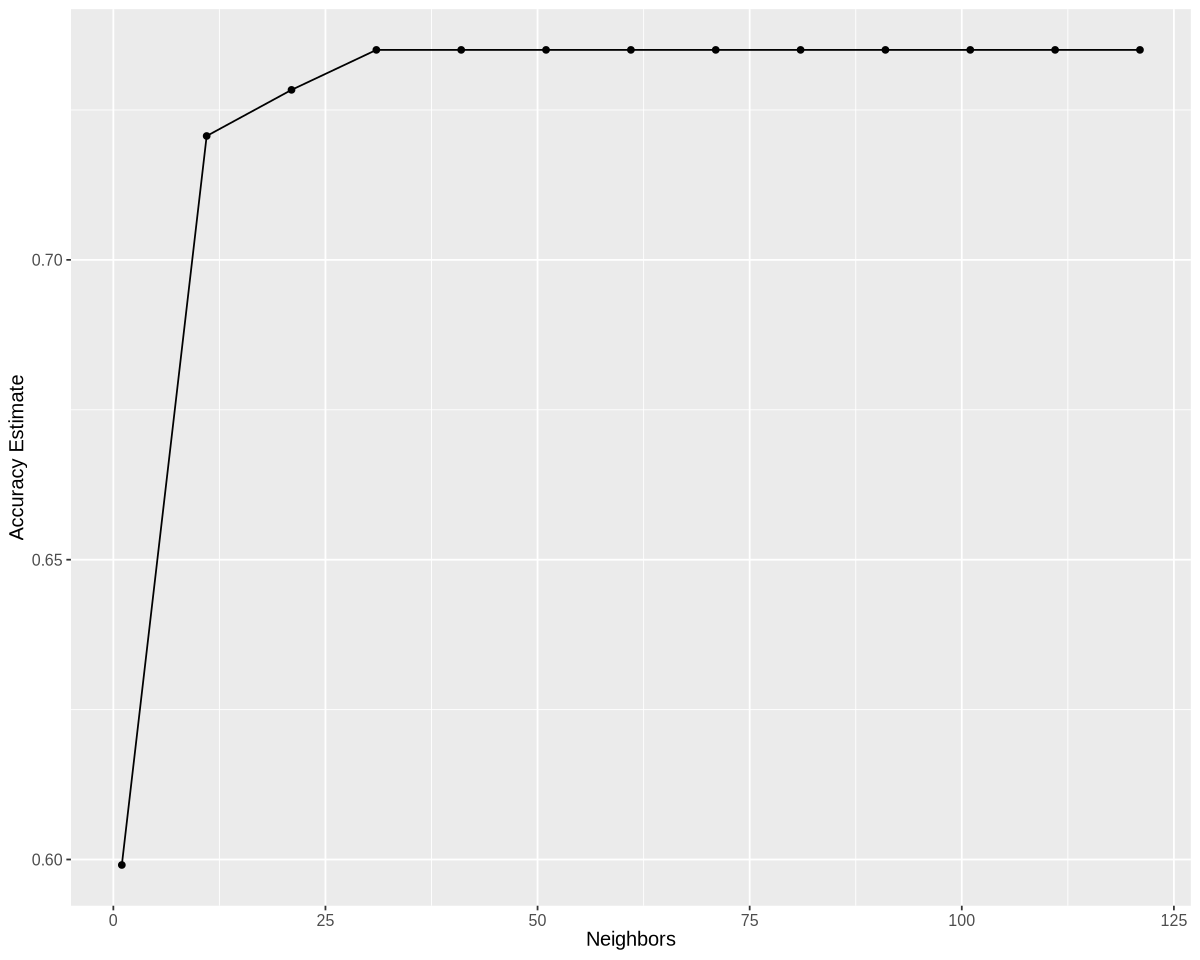

In [74]:
k_lots <- tibble(neighbors = seq(from = 1, to = 127, by = 10))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_lots) |>
  collect_metrics()

accuracies_lots <- knn_results |>
  filter(.metric == "accuracy")

accuracy_vs_k_lots <- ggplot(accuracies_lots, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k_lots

However, as from the plot above, we can see that there is no big drop even when $K$ approaches $127$. Instead, it remains roughly the same level. This shows that when $K = 26$, there is no overfitting.

Now we get the best $K$, it's time to build our final model with `neighbors` $=$ `best_k`. After building model, we can finally `fit` the model to our `training` data to retrain the knn classifier.


In [77]:
knn_spec_1 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec_1) |>
  fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(26,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2721088
Best kernel: rectangular
Best k: 26

Now, we have our classifier ready, it's time to use our `test` subset, to evaluate our model's quality. We first use this to make predictions based on the `players_test` subset, then use `bind_cols` to add the predicted lables next to the subset. With this, we can build our `metrics` to see our `accuracy`.

In [78]:
players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)


metrics <- players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class)

metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939
kap,binary,0.0000000


With this, we get the `accuracy` for our model, which is $0.73$.\
But we can still do more than this, to check the `recall` and `precision`. To do this, we need to build a confusion matrics.

In [76]:
conf_mat<- players_test_predictions %>%
    conf_mat(truth = subscribe, estimate = .pred_class)
conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36

Now with the confusion matrics, we can calculate our recall and precision. Note that our `Positive` here is `subscribe` = `true`\
$Precision = \frac{number\;of\;correct\;positive\;predictions}{number\;of\;total\;positive\;predictions} = \frac{36}{36+13} \approx 0.73$\
$Recall = \frac {number\;of\;correct\;positive\;predictions}{total\;number\;of\;truely\;positive\;test\;set\;observations} = \frac{36}{36} = 1$\
This means our model has excellent performances.\
We can also use `F1 Score` to check the balance between them:\
$F1 = 2\times\frac{Precision\times Recall}{Precision+Recall} = 2\times\frac{0.73}{1.73}\approx0.84$\
This means we have a good balance between them.

## Discussion

### Summary of Findings
The goal of our project was to answer the predictive question: “Will a player continue subscribing based on their previous gameplay data?” To address this, we used a K-Nearest Neighbors (KNN) classifier trained on gameplay metrics like session frequency and playtime. After hyperparameter tuning, the optimal value of k=26 was identified, yielding an accuracy of 73.47% on the testing set. However, the confusion matrix revealed that the model predicted all testing instances as the positive class (TRUE), failing to predict any FALSE outcomes. This suggests issues with class imbalance or inadequate feature representation.

Using the confusion matrix, we evaluated the model's precision, recall, and F1 score for predicting whether a player will subscribe (Positive = subscribe = true).
The model's Recall of 1.0 ensures that all potential churners are detected, which is vital for reducing player attrition. At the same time, a Precision of 0.73 demonstrates that the model is reasonably efficient in targeting the right players, limiting wasted resources. The overall F1 Score of 0.84 confirms a strong performance, making the model suitable for the given objectives. Further optimization can be explored by adjusting thresholds or refining features based on specific business priorities.

### Expected Findings vs. Outcome

Our initial expectation was that the classifier would achieve an accuracy above 70%, based on trends observed during exploratory data analysis. Visualizations of gameplay metrics, such as total playtime and session frequency, suggested that subscribing and non-subscribing players formed distinct clusters in the feature space. Specifically, we hypothesized that subscribing players would demonstrate higher engagement metrics, such as longer playtime, compared to their non-subscribing counterparts.

The achieved accuracy of 73.47% aligned with our expectations, suggesting that the model effectively captured some patterns in the data. However, the confusion matrix revealed a significant limitation: the classifier predicted all instances as the TRUE class (subscribing players). This outcome was unexpected and indicates a failure to generalize to the FALSE class (non-subscribing players).

Several factors may explain this discrepancy:

**Class Imbalance**: The dataset had more subscribing players than non-subscribing ones, potentially causing the model to favor the dominant class. This imbalance can skew the training process, resulting in biased predictions.

**Feature Representation**: While the gameplay metrics provided some predictive power, they may not fully differentiate between the two classes. For example, session frequency and playtime might overlap for borderline cases, making it challenging to distinguish subscribers from non-subscribers.

**Model Simplicity**: KNN’s performance heavily depends on the quality of the feature space and the choice of k. Despite selecting k=26 as the optimal value, the model might still lack the sophistication to capture complex, nonlinear relationships between features and the target variable.

This outcome highlights the importance of addressing data imbalance and exploring additional features to enhance the model’s predictive ability. Although the accuracy metric met expectations, the lack of meaningful predictions for the FALSE class significantly limits the model's practical utility. Future iterations will focus on mitigating these issues through improved data preprocessing and more robust modeling techniques.

Application Scenarios for Precision and Recall:

**Prioritizing Recall**: When Player Retention Is Critical
If the game's revenue depends heavily on long-term players, it’s vital to detect as many potential churners as possible.
High Recall ensures that most potential churners are identified, even at the expense of some False Positives (mistakenly targeting non-churning players).

Strategies:
Proactively intervene with predicted churners by offering in-game rewards, promotional events, or virtual currency.
Minimize FN (players who churn but were not identified) to avoid losing valuable players.

**Prioritizing Precision**: When Resources Are Limited
If intervention resources (e.g., rewards, campaigns) are costly or limited, focus on ensuring that identified churners are accurate predictions.
High Precision reduces wasted resources but might result in missing some actual churners.

Strategies:
Target only players with a high likelihood of churning.
Adjust the decision threshold (e.g., from the default 0.5 to 0.7) to improve Precision.

**Balancing Precision and Recall**: Finding a Middle Ground
When both retaining players and reducing resource waste are important, finding a balance between Precision and Recall is crucial.
The F1 Score (currently 0.84) is a useful metric to assess this balance in your model.

Strategies:
Use the F1 Score to evaluate overall model performance, as it balances Precision and Recall effectively.
Experiment with decision thresholds to achieve the desired balance. For example, a lower threshold favors Recall, while a higher threshold favors Precision.

In conclusion, high Recall is best for scenarios where player retention is critical, ensuring that most churners are identified and addressed. High Precision is best for cases with limited resources, reducing the chances of misallocating efforts on non-churners. For balance, we use the F1 Score (0.84) to ensure a reasonable balance, aligning Precision and Recall with business objectives.

### Impact of Findings

These findings demonstrate that subscription likelihood can be moderately predicted using gameplay data, which has significant implications for player retention strategies in gaming. Game developers could use such a model as a preliminary tool to identify players likely to churn, enabling targeted interventions such as personalized incentives or enhanced user experiences. However, due to the classifier's inability to distinguish between classes effectively, reliance on this model alone is unsuitable for critical business decisions. Further refinement, including addressing class imbalance and incorporating additional predictors, is essential before real-world deployment.

### Future Questions

1. What additional gameplay metrics (e.g., session frequency, in-game purchases) could improve the classifier's performance?
2. How can we address the class imbalance to improve predictions for the FALSE class?
3. What factors outside of gameplay, such as player demographics or platform preferences, influence subscription behavior?
4. Could switching to a more complex model, such as Random Forests or Gradient Boosting, improve performance while maintaining interpretability?
5. What specific patterns in player behavior correspond to short-term vs. long-term subscriptions, and how can this distinction inform retention strategies?
6. What is the impact of different subscription models (e.g., freemium vs. premium) on player retention?

### Conclusion

The KNN model provided a baseline for understanding player subscription trends, achieving moderate accuracy while revealing areas for improvement. The issues with class imbalance and feature limitations emphasize the need for further exploration of both data preprocessing and model selection. Future work will focus on incorporating additional gameplay metrics, addressing target imbalance, and evaluating more advanced models to build a robust and reliable predictive tool. These refinements will ensure the model’s practical applicability for gaming analytics and player retention strategies.
